# SUPPORT VECTOR MACHINE

### Import libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

### Import the dataset

In [2]:
df = pd.read_csv('Arrests.csv', index_col = 0) # Dataset, crimes per 100k inhabitants

### Dataset Analysis


In [3]:
print(df.head()) # Check the dataset header
df.info()
df.describe()

            Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Hopkins Tests

In [4]:
# A statistical test which allow to guess if the data follow an uniform distribution. If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. Hence clustering can be useful to classify the observations. However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand.
hopkins(scale(df), df.shape[0])

0.3860377791257606

### MODEL

### Instantiate and fit the model

In [5]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(df)

KMeans(n_clusters=2)

### Visualizing the clusters


[1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


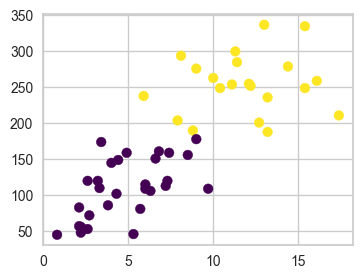

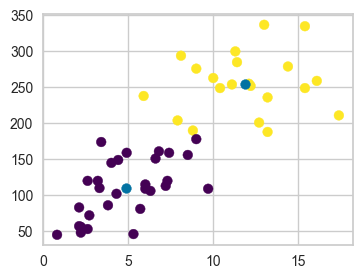

In [6]:
clusters = kmeans.labels_
print(clusters)
plt.figure(figsize=(4,3))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, cmap='viridis')

centroids = kmeans.cluster_centers_
plt.figure(figsize=(4,3))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1])

### Elbow method for optimal value of K


Text(0.5, 1.0, 'Elbow Curve')

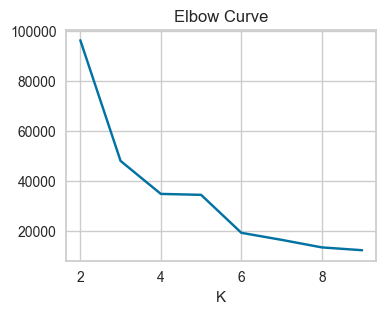

In [7]:
rate = []
K = range(2,10)

for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    rate.append(kmeans.inertia_)

plt.figure(figsize=(4,3))
plt.plot(K, rate)
plt.xlabel('K')
plt.title('Elbow Curve')

### Elbow method (Another Way)


findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


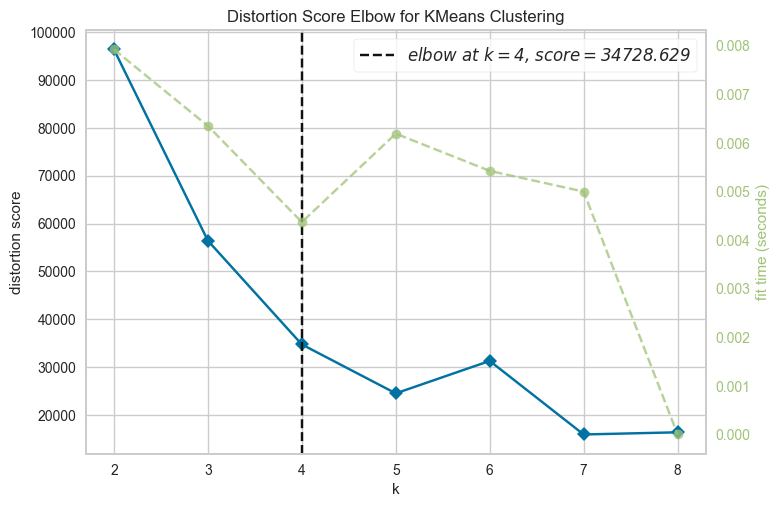

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
kmeans_yellowbrick = KMeans()
graph = KElbowVisualizer(kmeans_yellowbrick, k = (2,9))
graph.fit(df)
graph.poof()

### Model with optimal value of K


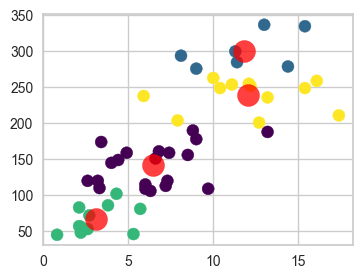

In [9]:
new_kmeans = KMeans(n_clusters = 4)
new_kmeans.fit(df)
clusters = new_kmeans.labels_
centroids = new_kmeans.cluster_centers_
plt.figure(figsize=(4,3))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 75, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], s=250, c='red',alpha=0.75)

In [10]:
labels = new_kmeans.labels_
df["cluster_id"] = labels
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.40902213555475503


### ARI Score

In [11]:
new_df = df.sample(15)
new_df["true_label"] = [1, 2, 3, 0, 2, 2, 1, 3, 2, 0, 2, 1, 1, 2, 3]
adjusted_rand_score(new_df["true_label"],new_df["cluster_id"])

-0.08783783783783784